<a href="https://colab.research.google.com/github/PetrGavrilin/VKR_URFU/blob/main/VKR_part4_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>k ближайших соседей</h1>

In [ ]:
# импорт необходимых библиотек
from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

from sklearn import metrics

from sklearn.model_selection import RandomizedSearchCV # для поиска при случайном сэмплирование гиперпараметров
from sklearn.model_selection import GridSearchCV

import random

from sklearn.neighbors import KNeighborsRegressor # Регрессия К-Ближайших соседей от scikit-learn

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

import sys
#sys.path.append('/content/drive/MyDrive')
sys.path.append('/content')

from vkr_function import print_scores, plot_predict, my_features_extraction, my_test_train_split
#import vkr_function2

In [ ]:
# для вывода таблиц pandas снимаем ограничение по количеству выводимых столбцов и строк
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
Y = pd.read_csv('/content/flow_rate.csv')
X_tsfel = np.genfromtxt('/content/X_tsfel.csv', delimiter=',')[1:]
X_tsfel_savgol = np.genfromtxt('/content/X_tsfel_savgol.csv', delimiter=',')[1:]
borders = pd.read_csv('/content/borders.csv').values.tolist()[0]

In [ ]:
X = X_tsfel
X_train, y_train, X_test, y_test, i_test = my_test_train_split(X, Y, borders)

In [ ]:
# метод k ближайших соседей

k = 9
weights = 'distance'

# создаем объект класса с указанием гиперпараметров
kNN = KNeighborsRegressor(n_neighbors=k,
                          weights=weights )

# обучаем на тренировочных данных
kNN.fit(X_train, y_train)

# предсказываем на тестовых данных
y_predict=kNN.predict(X_test)

print_scores(y_test, y_predict)

Ошибка на тестовых данных
MSE: 0.0015
RMSE: 0.0383
R2 : 0.9972


In [ ]:
# Обучение модели и вывод метрик
y_predict=kNN.predict(X_test)
print_scores(y_test, y_predict)


Ошибка на тестовых данных
MSE: 0.0015
RMSE: 0.0383
R2 : 0.9972


In [ ]:
y_predict_all = kNN.predict(X)
print_scores(Y, y_predict_all, False)

Ошибка на полных данных
MSE: 0.0001
RMSE: 0.0120
R2 : 0.9997


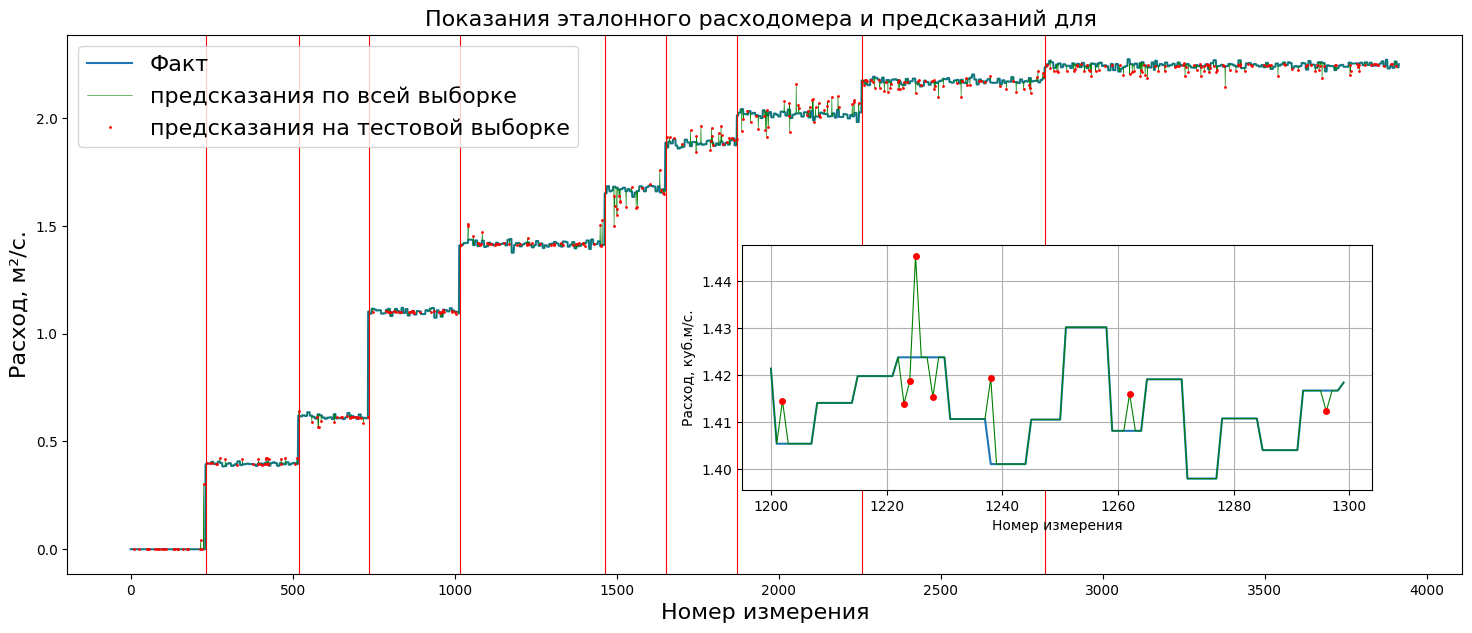

In [ ]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="")

Из колебаний графика предсказаний вокруг фактических данных, а также учитывая построенный ранее график из исходных данных по разности времён, можно предположить, что для исключения колебаний показания расхода необходимо применить сглаживание к исходным данным.

In [ ]:
sig_up.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
0,-485.815430,97.485352,485.815430,-103.930664,-7.250977,-154.687500,-274.731445,-144.213867,167.578125,310.986328,-184.497070,-244.116211,234.448242,125.683594,153.881836,10.473633,104.736328,-275.537109,-351.269531,-181.274414,-109.570312,65.258789,267.480469,42.700195,-127.294922,29.809570,-198.193359,-123.266602,-9.667969,298.095703,-70.898438,11.279297,445.532227,130.517578,-254.589844,-244.116211,-368.188477,-319.848633,-178.051758,-6.445312,115.209961,116.015625,4.833984,78.955078,164.355469,112.792969,422.973633,-174.023438,-301.318359,-46.728516,364.965820,208.666992,-226.391602,-163.549805,-368.994141,-404.443359,-199.804688,1.611328,302.929688,397.192383,-96.679688,-211.083984,-112.792969,310.986328,350.463867,133.740234,-35.449219,-385.107422,-282.788086,-58.813477,109.570312,-51.562500,-332.739258,-199.804688,-162.744141,-26.586914,252.978516,426.196289,53.173828,-88.623047,149.853516,-69.287109,-172.412109,226.391602,161.132812,-105.541992,-317.431641,-213.500977,-203.027344,-149.853516,-57.202148,-121.655273,177.246094,367.382812,-11.279297,145.019531,-1.611328,-68.481445,-29.003906,123.266602,-375.439453,-302.124023,91.040039,255.395508,198.193359,-50.756836,-348.046875,-354.492188,-163.549805,62.036133,406.860352,292.456055,146.630859,-212.695312,-228.808594,-258.618164,-2.416992,69.287109,-48.339844,-153.076172,-81.372070,66.064453,253.784180,169.995117,286.816406,-35.449219,-435.058594,-360.937500,-29.003906,360.131836,-257.006836,-98.291016,-80.566406,81.372070,-130.517578,-127.294922,-48.339844,226.391602,78.955078,143.408203,52.368164,181.274414,119.238281,-231.225586,-296.484375,-248.950195,-364.160156,-85.400391,273.120117,476.953125,-103.930664,-167.578125,-129.711914,-68.481445,120.849609,257.006836,181.274414,-121.655273,-105.541992,-223.168945,-195.776367,-197.387695,240.893555,215.112305,58.007812,-431.835938,-120.849609,316.625977,168.383789,-55.590820,-148.242188,-252.978516,-184.497070,91.040039,421.362305,20.947266,-172.412109,-257.812500,-98.291016,113.598633,215.112305,168.383789,-2.416992,-

Обучение модели на дополнительно обработанных данных с помощью функции Савицкого-Голея

In [ ]:
X = X_tsfel_savgol
X_train, y_train, X_test, y_test, i_test = my_test_train_split(X, Y, borders)

In [ ]:
# обучаем на тренировочных данных
kNN.fit(X_train, y_train)

# предсказываем на тестовых данных
y_predict=kNN.predict(X_test)

print_scores(y_test, y_predict)

Ошибка на тестовых данных
MSE: 0.0001
RMSE: 0.0077
R2 : 0.9999


In [ ]:
y_predict_all = kNN.predict(X)
print_scores(Y, y_predict_all, False)

Ошибка на полных данных
MSE: 0.0000
RMSE: 0.0024
R2 : 1.0000


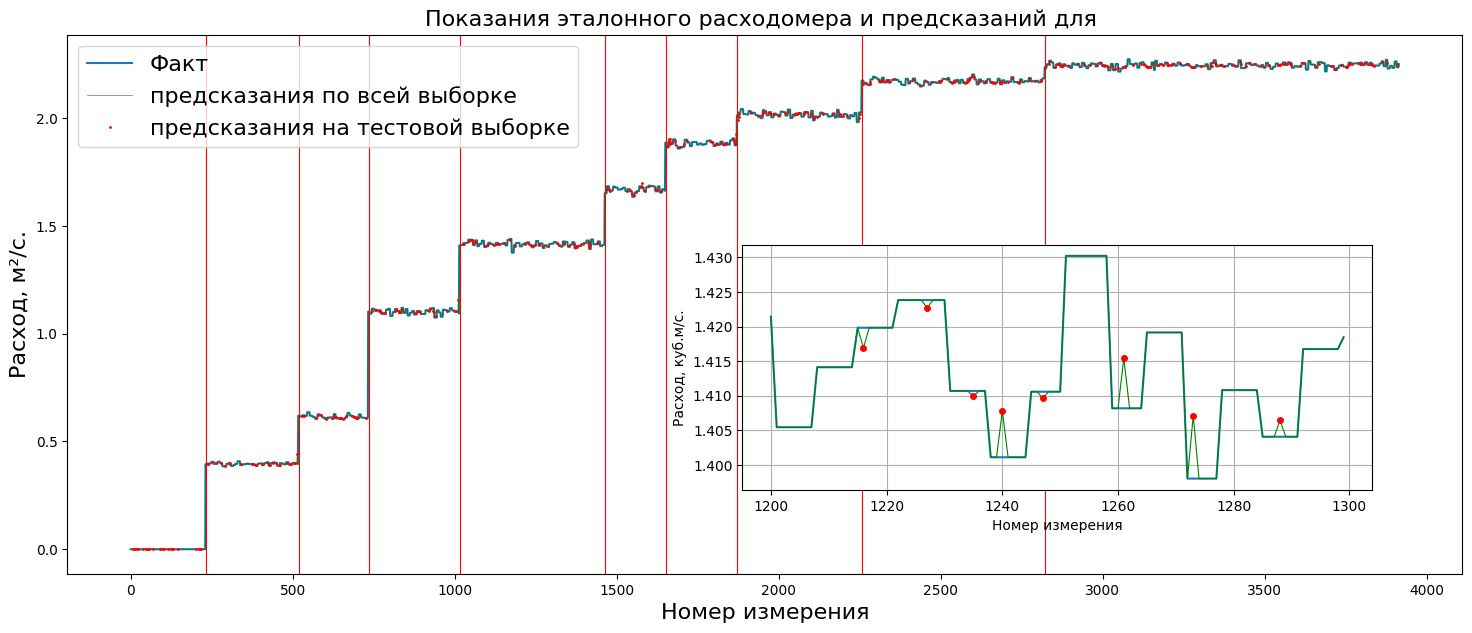

In [ ]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="")

Проверим работу модели, приняв за тестовую выборку один из режимов расхода

In [ ]:
l_ = len(Y)

i_test = list(range(borders[3],borders[4]))

i_train = list(range(0,l_))
for x1 in i_test:
  i_train.remove(x1)

X_train = X[i_train,:]
y_train = Y[i_train]

X_test = X[i_test,:]
y_test = Y[i_test]

print(len(X_train), len(y_train))

3466 3466


In [ ]:
# обучаем на тренировочных данных
kNN.fit(X_train, y_train)

# предсказываем на тестовых данных
y_predict=kNN.predict(X_test)

print_scores(y_test, y_predict)

Ошибка на тестовых данных
MSE: 0.0528
RMSE: 0.2299
R2 : -202.6205


In [ ]:
y_predict_all = kNN.predict(X)
print_scores(Y, y_predict_all, False)

Ошибка на полных данных
MSE: 0.0061
RMSE: 0.0779
R2 : 0.9883


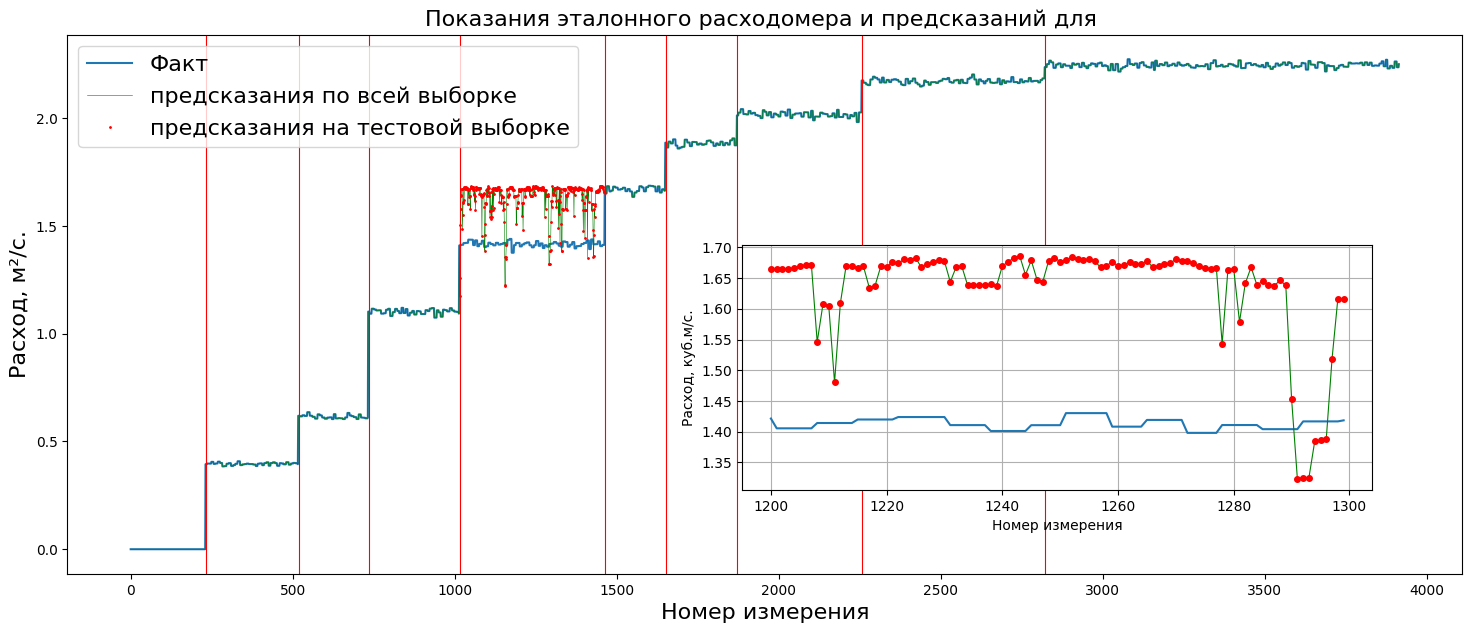

In [ ]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="")

In [ ]:
Y[1015:1464].sum()/(1464-1015)

1.4169322693003341

In [ ]:
y_predict_all[1015:1464].sum()/(1464-1015)

1.631945801208891